<a href="https://colab.research.google.com/github/kAi3345/Dark-Matter/blob/main/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install gwpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99254 sha256=0e561bec2296154c6335f0cf8d90c690ef9498d7c21ae5de3ccd65d84904ec97
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


In [34]:
t0 = 1242459857.4                     # GW190521_074359

In [35]:
from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', t0 - 32, t0 + 32)

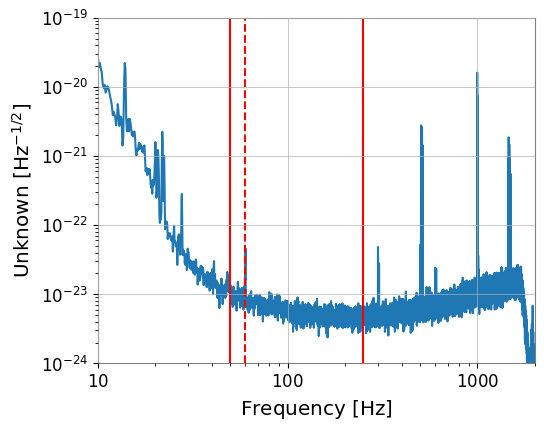

In [36]:
import matplotlib.pyplot as plt

fig2 = hdata.asd(fftlength=8).plot()
plt.xlim(10,2000)                                              # set x axis from 10 to 2000
ymin = 1e-24                                                   # set minimum value in y-axis to 10^-24
ymax = 1e-19                                                   # set maximun value in y-axis to 10^-19
plt.ylim(ymin, ymax)
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red")    #overlap 60Hz frequency to mark it's unwanted
#plt.vlines(120, ymin, ymax, linestyle="dashed", color="red")   #overlap 120Hz frequency to mark it's unwanted
#plt.vlines(180, ymin, ymax, linestyle="dashed", color="red")   #overlap 180Hz frequency to mark it's unwanted
plt.vlines(50, ymin, ymax, linestyle="solid", color="red")     #show the left boundary of frequency window
plt.vlines(250, ymin, ymax, linestyle="solid", color="red")    #show the left boundary of frequency window

In [37]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 200, hdata.sample_rate)            # create a frequency window of 50-250Hz so that we can search gravitational wave signal

notches = [filter_design.notch(line, hdata.sample_rate) for        # build a filter for unwanted 60, 120, 180 Hz frequency
           line in (60, 120, 180)]

zpk = filter_design.concatenate_zpks(bp, *notches)                 # concatenate each of filters together to create a single ZPK

hfilt = hdata.filter(zpk, filtfilt=True)                           # get data after the filter


In [38]:
hdata = hdata.crop(*hdata.span.contract(1))                        # original data from hanford
hfilt = hfilt.crop(*hfilt.span.contract(1))                        # data after croping out all the unwanted frequency

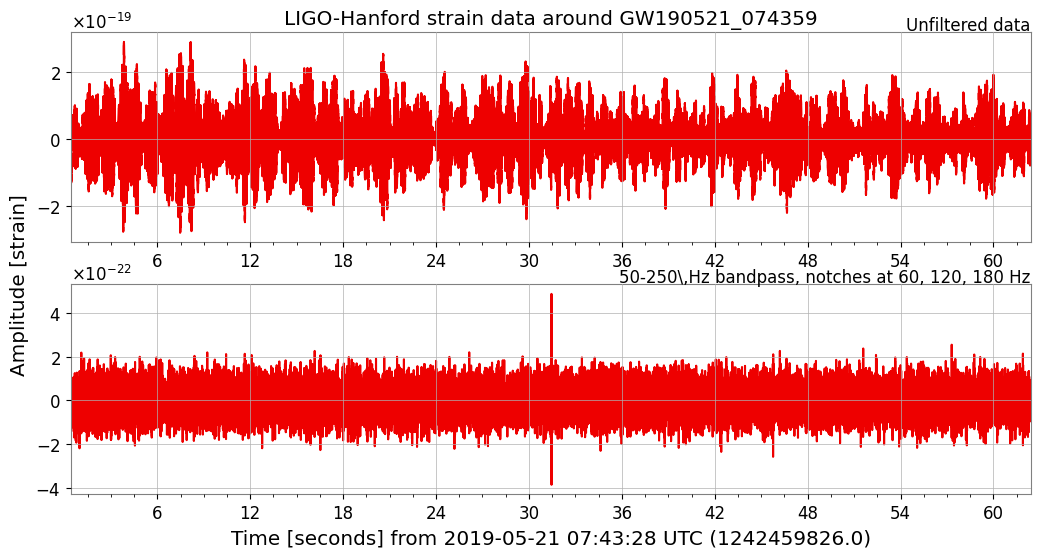

In [39]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW190521_074359')                       # title for the graph
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')     # notice that the data in the graph is unfiltered
ax1.set_ylabel('Amplitude [strain]', y=-0.2)                                    # lable for y axis
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',         # signal the data in the graph has been filtered
         transform=ax2.transAxes, ha='right')
plot.show()

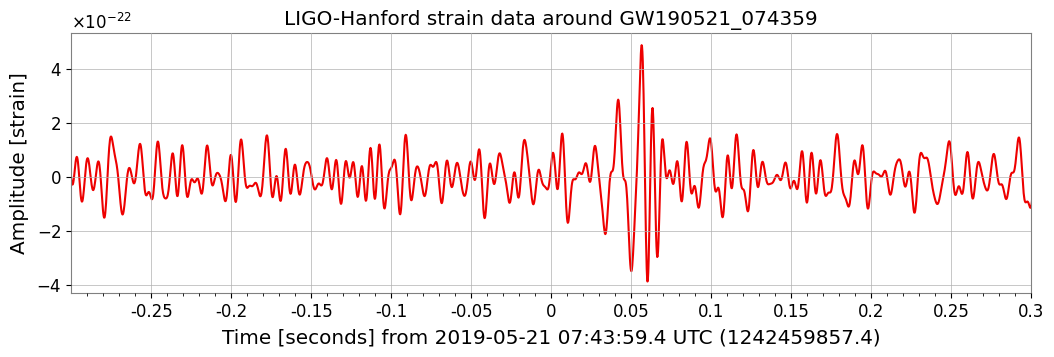

In [40]:
import matplotlib.pyplot as plt

plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW190521_074359')                        # title of the graph
ax.set_ylabel('Amplitude [strain]')                                             # meaning of y axis
ax.set_xlim(t0 - 0.3, t0 + 0.3)                                                 # set the limit of x axis
ax.set_xscale('seconds', epoch=t0)                                              # the unit of x axis is in seconds
plot.show()

x_val = plt.gca().lines[0].get_xdata()                                          # x-value array of the plot
y_val = plt.gca().lines[0].get_ydata()

In [44]:
ldata = TimeSeries.fetch_open_data('L1', t0 - 32, t0 + 32)                # access data from Livingston Ligo
lfilt = ldata.filter(zpk, filtfilt=True)                                        # filter the unwanted frequency

In [45]:
lfilt *= -1

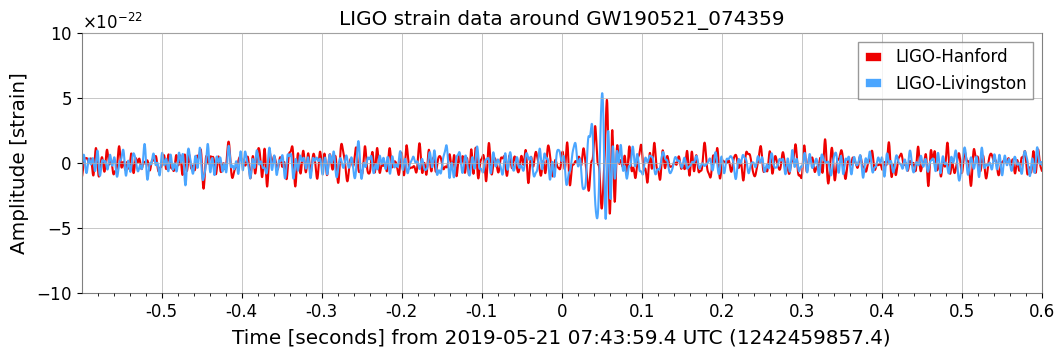

In [46]:
#comparison of gravitational
plot = Plot(figsize=[12, 4])                                                    # set size of the graph
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')                 # set the color of Hanford data curve and label the curve
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')           # set the color of Livingston data curve and label the curve
ax.set_title('LIGO strain data around GW190521_074359')                                # set the title of the graph
ax.set_xlim(t0 - 0.6 , t0 + 0.6 )
ax.set_xscale('seconds', epoch=t0)
ax.set_ylabel('Amplitude [strain]')                                             # label of y axis
ax.set_ylim(-1e-21, 1e-21)
ax.legend()
plot.show()